# Machine learning for risk management


Risks can be market risk (e.g., increase in interest rates), credit risk (e.g., unable to honour debt), operational risk (e.g., inherent operation(s) in a company are bad for sustainability), and liquidity risk( e.g., a company cannot turn its assets into cash within a short period of time)

## ARMA models


In [22]:
import yfinance as yfin
import numpy as np 
import pandas as pd 
import pandas_datareader.data as pdr
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

yfin.pdr_override()

# List of stock symbols
# S&P 500 index
ticker = '^GSPC'

# Set the date range for the historical data
start_date = '2015-01-01'
end_date = '2021-01-01'

# Download historical stock data for the S&P 500 with interval of 1 month

snp_index = pdr.get_data_yahoo(ticker, start_date, end_date,interval='1mo').Close



[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

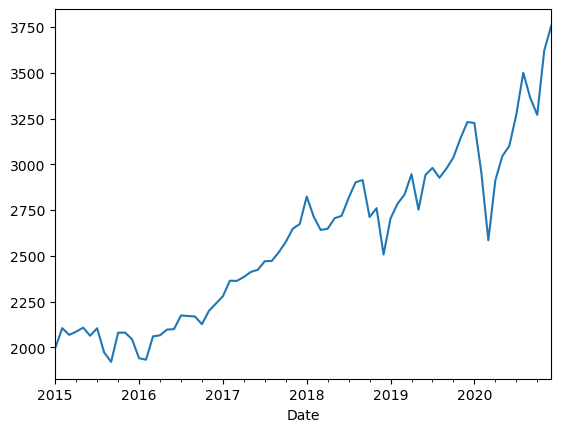

In [23]:
snp_index.plot()

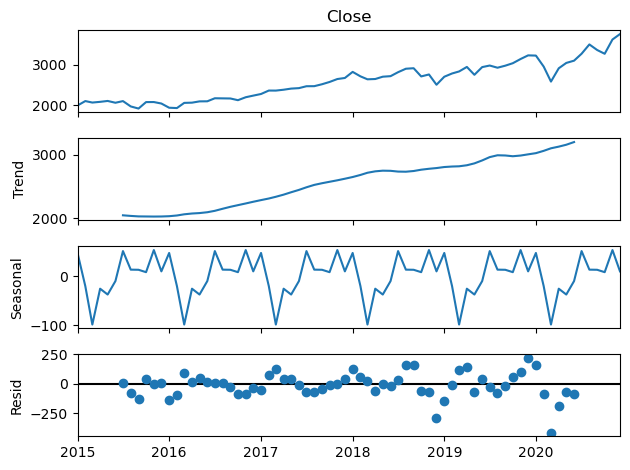

In [24]:
# Plot  the components of a time series by
# seasonal_decompose function from statsmodels

seasonal_decompose(snp_index, period=12).plot()

plt.show()

## ACF and PCF

Auto-correlation functions (ACF) show the correlation between the same series with different lags. With h being the lag:

$ρ(h) = \frac{Cov(X_t , X_{t−h} )}{Var(X_t )}$

The coefficients help in deciding the q in MA(q) models.

Partial ACF (PACF) gives information on correlation between current value of a time series
and its lagged values controlling for the other correlations.

$ρ(h) = \frac{Cov(X_t ,X_{t−h} |X_{t−1} ,X_{t−2} ...X_{t−h−1})}{
\sqrt{Var(X_t |X_{t−1} ,X_{t−2} ,...,X_{t−h−1} )Var(X_{t−h} |X_{t−1} ,X_{t−2} ,...,X_{t−h−1} )}}$

The coefficients help in deciding the p in AR(p) models.


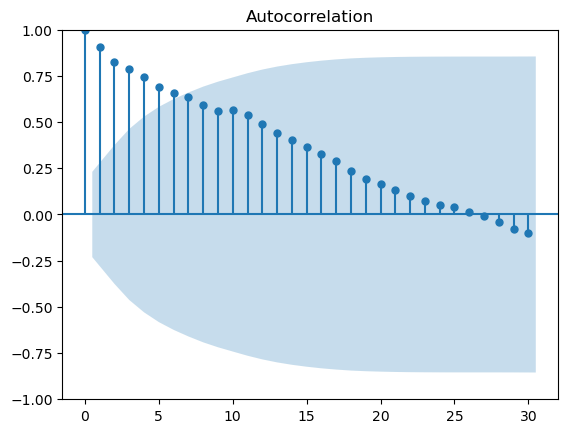

In [25]:
sm.graphics.tsa.plot_acf(snp_index,lags=30)
plt.show()

It shows that  there is strong dependence between the current value and lagged values of
S&P-500 data as the coefficients of autocorrelation decay slowly.

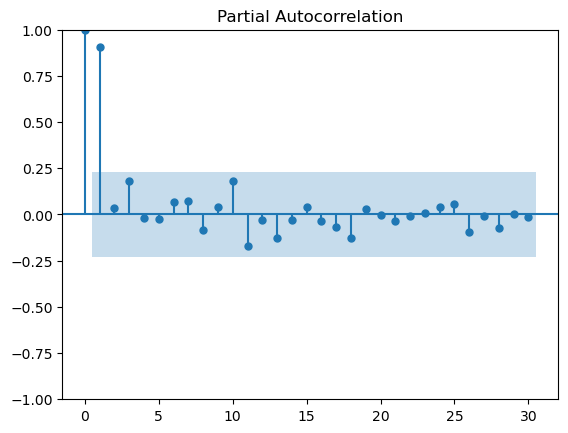

In [26]:
sm.graphics.tsa.plot_pacf(snp_index, lags=30)
plt.show()

Lines above the confidence intervals are considered significant. We see the model with lag of 2 coefficient is enough to model.

In [42]:
from statsmodels.tsa.stattools import adfuller
# Testing stationarity
stat_test = adfuller(snp_index)[0:2]
print(f"The test statistic and p-value of ADF test are {stat_test}")
if stat_test[1] < 0.05:
    print("The data is stationary")
else:
    print("The data is not stationary")

The test statistic and p-value of ADF test are (0.03029512007292659, 0.9609669053518538)
The data is not stationary


### Stationarity

To make the time series stationary we have to remove the trend and seasonality from the dataset. 

The test statistic and p-value of ADF test are (-7.263763418065255, 1.6554166059993893e-10)
The data is stationary


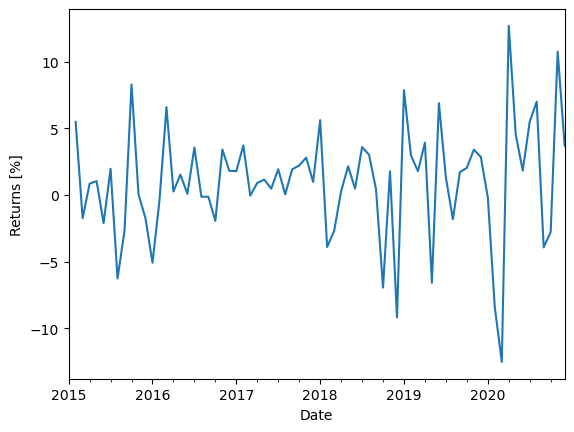

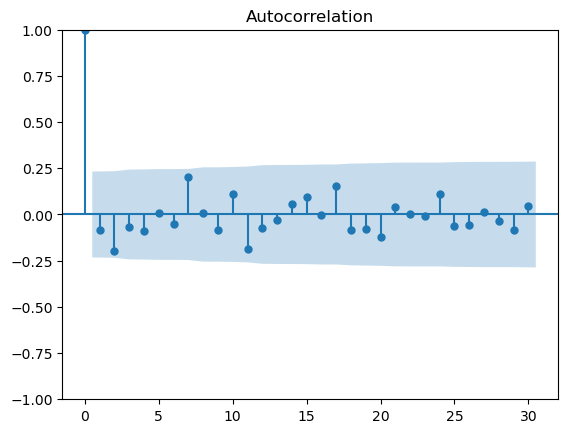

In [43]:
# remove stationarity using differencing
returns = snp_index.pct_change()*100
returns.plot(ylabel="Returns [%]")

sm.graphics.tsa.plot_acf(returns.dropna(),lags=30)

stat_test = adfuller(returns.dropna())[0:2]
print(f"The test statistic and p-value of ADF test are {stat_test}")
if stat_test[1] < 0.05:
    print("The data is stationary")
else:
    print("The data is not stationary")
plt.show()